<a href="https://colab.research.google.com/github/TurgutOzkan/DataSciencity/blob/master/How_to_Obtain_Coefficients_in_Linear_Regression_Gradient_Descent%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the previous [post](https://datasciencity.com/2020/09/29/how-to-obtain-coefficients-in-linear-regression), we discussed how to derive the linear regression parameters (coefficients) and showed how to apply the normal equation to derive the parameters. In this post, we will focus on obtaining coefficients using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) approach. Similar to the previous one, this post aims to provide notes on the equations and quick implementations, rather than explanation of the intuition. Let's start with defining what we need:

If we define m as the sample size and j as feature index up to k, then 
our cost function: <center>  $\large J(W)=\frac{1}{2m}\sum_{i=1}^{m}(h_W(x^{(i)})-y^{(i)})^{2}$ </center>

**Gradient descent algorithm**

Repeat until convergence:

<center> $ \large
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1, .. \theta_k)
$</center>

where

j=0, to k --the feature index number.

Please note that we update weights simultaneously. That is, for a one-variable problem, we would update $\theta_0 \space and \space \theta_1$ simultaneously.

\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}

$ \large \frac{\partial}{\partial \theta_j} J(\theta) $ is obtained through a series of operation as detailed below:

$ \large \frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} \frac{1}{2} (h_\theta(x) - y)^2 $

$ \large \frac{\partial}{\partial \theta_j} J(\theta) =2 \cdot \frac{1}{2} (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} (h_\theta(x) - y)$

$ \large \frac{\partial}{\partial \theta_j} J(\theta) = (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} (\sum_{i=0}^{m} \theta_i x_i - y)$

$ \large \frac{\partial}{\partial \theta_j} J(\theta) = (h_\theta(x) - y) \cdot x_j$ 

Let's summarize everything in the vectorized form:

Defining feature matrix as X, feature parameter as $\theta$, sample size as $m$ and feature size as $n$, and the observed output as $y$:

Hypothesis: <center> $ \large h_\theta(X) = \theta^T X$ </center>

Cost Function: <center> $ \large J(\theta) = \frac{1}{2m}(X\theta - y)^T (X\theta - y)$ </center>

Gradient Descent: <center> $ \large \theta := \theta - \frac{\alpha}{m}X^T(X\theta - y)$ </center>

Normal Equation: <center> $ \large \theta = (X^T X)^{-1} X^T y$ </center>

Now, let's define functions that will do the necessary operation formulated above. We will create a function for our hypothesis, which will provide a linear combination of features with their associated weights; a cost function, which will gauge the disparity between the observed and the predicted outcome; and a gradient descent function, which will update our weights based on identifying which directions we should move in the parameter space and by updating the weights accordingly.

In [1]:
def hypothesis(theta, X):
    """Returns predictions"""
    return theta.T.dot(X)

def cost_function(theta, X, y):
    """Returns the cost"""
    m = X.shape[0]
    J = (1.0 / (2.0 * m)) * (X.dot(theta) - y).T * (X.dot(theta) - y)
    return J

def gradient_descent(X, y, alpha=0.1, iter=100):
    """"Calculates gradient descent and return 
    feature parameters and overall cost"""
    m = X.shape[0]
    i = 0
    theta = np.matrix([np.zeros(X.shape[1])]).T # initialize theta
    overall_cost = []
    for k in range(iter):
        theta = theta - (alpha / m) * X.T.dot( (X.dot(theta) - y))
        cost = cost_function(theta, X, y)
        overall_cost.append(float(cost))
    return theta, overall_cost

In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
# create a toy data
X, y = make_regression(n_samples=506, n_features=3, n_informative=3, random_state=32)
# Convert to matrices for ease of matrix multiplication later
X = np.matrix(X)
y = np.matrix(y).T

print(X.shape, y.shape)

(506, 3) (506, 1)


Model Parameters: [[4.02964561e-02]
 [6.37424682e+01]
 [9.00065101e+01]
 [2.31164469e+01]]


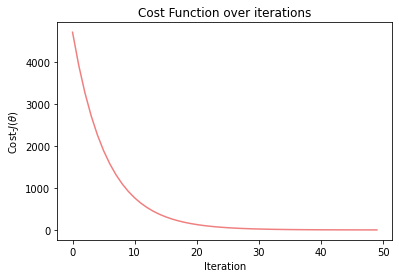

In [4]:
# Apply gradient descent and plot the cost function
ones = np.ones((X.shape[0], 1))
Xb = np.concatenate((ones, X), axis=1)
theta, overall_cost = gradient_descent(Xb, y, alpha=0.1, iter=50)

print("Model Parameters:", theta)
plt.plot(overall_cost, color='lightcoral')
plt.xlabel('Iteration')
plt.ylabel(r'Cost-$J(\theta)$')
plt.title("Cost Function over iterations")
plt.show()

Using the equation for the weights:
$ \theta = (X^TX)^{-1} \space X^Ty \hspace{10.5cm} $

In [5]:
theta_normal_equation = np.linalg.pinv( Xb.T.dot( Xb)).dot( Xb.T.dot( y))
print(theta_normal_equation)

[[4.55191440e-15]
 [6.48150838e+01]
 [9.07559538e+01]
 [2.37143548e+01]]


Now, let's use the Scikit-learn package to compare with our own implementation.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)
y_hat = model.predict(X)
print("slope:", model.coef_)
print("intercept:", model.intercept_)

slope: [[64.81508384 90.75595379 23.71435485]]
intercept: [-7.77156117e-15]


We got similar results when we applied gradient descent.Note that the learning rate and the number of iteration matters a lot in gradient descent. if we had chosen different values for these, we would have had a somewhat different result. Usually, gradient descent in linear regression requires many iterations in the order of hundreds and sometimes thousands to approach normal equation results. Now, let's work on a completely different dataset.

In [10]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
X, y = load_diabetes(return_X_y=True)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(442, 10) (442, 1)


Model Parameters: [[ 152.13348416]
 [  -6.62747982]
 [-236.50967437]
 [ 528.89599077]
 [ 322.07538703]
 [-100.76917287]
 [ -82.22478218]
 [-196.10047313]
 [ 109.28925041]
 [ 487.70727647]
 [  70.14857432]]


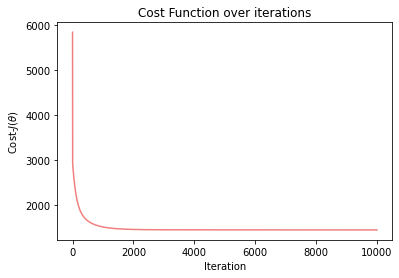

In [11]:
ones = np.ones((X.shape[0], 1))
Xb = np.concatenate((ones, X), axis=1)

# apply gradient descent
theta, overall_cost = gradient_descent(Xb, y, alpha=0.5, iter=10000)
print("Model Parameters:", theta)

plt.plot(overall_cost, color='lightcoral')
plt.xlabel('Iteration')
plt.ylabel(r'Cost-$J(\theta)$')
plt.title("Cost Function over iterations")
plt.show()

In [12]:
# Normal equation
theta_from_norm = np.linalg.pinv( Xb.T.dot( Xb)).dot( Xb.T.dot( y))
print(theta_from_norm)

[[ 152.13348416]
 [ -10.01219782]
 [-239.81908937]
 [ 519.83978679]
 [ 324.39042769]
 [-792.18416163]
 [ 476.74583782]
 [ 101.04457032]
 [ 177.06417623]
 [ 751.27932109]
 [  67.62538639]]


In [13]:
# scikit learn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
print("slopes:", reg.coef_)
print("intercept:", reg.intercept_)
y_hat = reg.predict(X)

slopes: [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]
intercept: [152.13348416]


This concludes this post. Understanding the mechanics behind linear estimators is very important to understand more complex algorithms used in machine learning, such as neural networks.It is highly advisable to work on derivations on a piece of paper. Talk to you soon!